# Handy small functions related to astronomical research

# Defining function

In [138]:
import math
import numpy as np

def Planckfunc_cgs(freq, temperature):
  """
  Calculate Planck function.
  
  Inputs:
     freq: frequency, in Hz
     temperature: temperature in Kelvin
     
  Return:
     Intensity: in cgs unit ( erg s^-1 sr^-1 cm^-2 Hz-1 )
  """

  # defining physical constants
  c_cgs       = 29979245800.0   # light speed
  h_cgs       = 6.62606885e-27  # planck constant
  kB_cgs      = 1.38064852e-16  # Boltzmann constant

  A = ( 2.0 * h_cgs * (freq**3.0) ) /  ( c_cgs ** 2.0 )
  B = math.exp( (h_cgs * freq) / (kB_cgs * temperature) )
  
  return A * ( 1.0 / (B - 1.0) )



def Planckfunc_mks(freq, temperature):
  """
  Calculate Planck function.
  
  Inputs:
     freq: frequency, in Hz
     temperature: temperature in Kelvin
     
  Return:
     Intensity: in mks unit ( J s^-1 sr^-1 m^-2 Hz-1 )
  """

  # defining physical constants
  c_mks       = 299792458.0   # light speed
  h_mks       = 6.62607004e-34  # planck constant
  kB_mks      = 1.38064852e-23  # Boltzmann constant

  A = ( 2.0 * h_mks * (freq**3.0) ) /  ( c_mks ** 2.0 )
  B = math.exp( (h_mks * freq) / (kB_mks * temperature) )
  
  return A * ( 1.0 / (B - 1.0) )

# Plotting

In [139]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Plot Planck function in cgs and mks unit

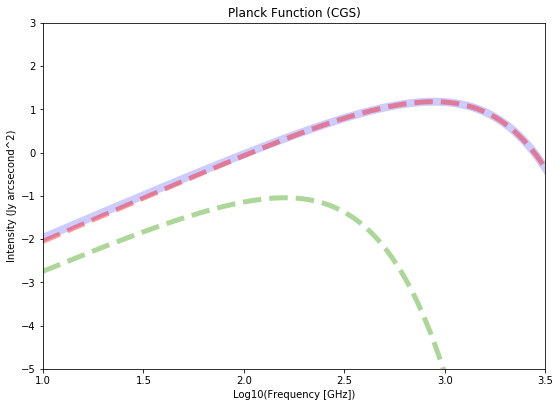

In [180]:
output_array_cgs = np.arange(1, 501) * 0.0   # output of planck function
output_array_mks = np.arange(1, 501) * 0.0

cgsflux_to_Jy = 10e23
mksflux_to_Jy = 10e26

str_to_sqdegree    = 3282.80635
str_to_sqarcsecond = 3282.80635 * (3600.0 ** 2.0)

# evaluate Planck function in CGS unit
temperature  = 15.0                  # Kelvin
freq_array   = np.arange(1, 501) * 10e9  # frequency in Hz
for id in list(range(0, 500)):
   output_array_cgs[id] = Planckfunc_cgs(freq_array[id], temperature) * \
                                  cgsflux_to_Jy / str_to_sqarcsecond
   freq_array[id]   = math.log10( freq_array[id]  / 1e9 )
    
    
# evaluate Planck function in MKS unit
TCMB  = 2.72548                  # Kelvin
freq_array   = np.arange(1, 501) * 10e9  # frequency in Hz
for id in list(range(0, 500)):
   output_array_mks[id] = Planckfunc_mks(freq_array[id], TCMB) * \
                                  mksflux_to_Jy / str_to_sqarcsecond
   freq_array[id]   = math.log10( freq_array[id]  / 1e9 )


# plotting
fig = plt.figure(figsize=(9, 14))
plt.subplot(2, 1, 1)
plt.axis([1.0, 3.5, -5, 3])
plt.plot(freq_array, np.log10(output_array_cgs), \
         color = (0, 0, 1.0, 0.2),
         linewidth=8)
plt.plot(freq_array, np.log10(output_array_mks), \
          linestyle = 'dashed',
          color = (0.2, 0.6, 0, 0.4),
          linewidth =5)
plt.plot(freq_array, np.log10(output_array_cgs - output_array_mks), \
          linestyle = 'dashed',
          color = (1.0, 0, 0, 0.4),
          linewidth =5)
plt.title('Planck Function (CGS)')
plt.xlabel('Log10(Frequency [GHz])')
plt.ylabel('Intensity (Jy arcsecond^2)')